In [1]:
# Cell 1: Import Libraries
# by Aarav Singhal
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import logging

# Set up logging for debugging
logging.basicConfig(level=logging.INFO)

# Load the dataset
file_path = 'cleaned_twitter_training.csv'  # Update the path if necessary

try:
    data = pd.read_csv(file_path)
    logging.info("Dataset loaded successfully!")
except Exception as e:
    logging.error(f"Error loading dataset: {e}")

# Display the first few rows of the dataset
data.head()


INFO:root:Dataset loaded successfully!


,ID,Category,Sentiment,Text,Cleaned_Text,Sentiment_Label
0,2401,borderlands,positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,3
1,2401,borderlands,positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,3
2,2401,borderlands,positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,3
3,2401,borderlands,positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,3
4,2401,borderlands,positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...,3


In [2]:
# Cell 2: Preprocessing and Splitting Data

# Define features and target
X = data['Text']  # Text data (tweets)
y = data['Sentiment']  # Sentiment labels (positive, negative, neutral)

# Convert the text to strings (if not already) and fill missing values
X = X.astype(str).fillna('')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log the sizes of training and testing sets
logging.info(f"Training data size: {len(X_train)}")
logging.info(f"Testing data size: {len(X_test)}")


INFO:root:Training data size: 57324
INFO:root:Testing data size: 14331


In [3]:
# Cell 3: Vectorizing the Text Data

# Convert text data to numerical vectors using CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform both training and testing data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Log the number of features
logging.info(f"Number of features extracted: {X_train_vectorized.shape[1]}")


INFO:root:Number of features extracted: 29769


In [4]:
# Cell 4: Train and Evaluate Random Forest Classifier

# Create and train a Random Forest classifier
import joblib
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test_vectorized)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
logging.info(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Accuracy:", rf_accuracy)

joblib.dump(rf_classifier,"./rf_model.joblib")


INFO:root:Random Forest Accuracy: 0.9233


Random Forest Accuracy: 0.9233130974809852


['./rf_model.joblib']

In [5]:
# Cell 5: Train and Evaluate Naive Bayes Classifier

# Create and train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
nb_predictions = nb_classifier.predict(X_test_vectorized)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
logging.info(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print("Naive Bayes Accuracy:", nb_accuracy)

joblib.dump(nb_classifier,"./nb_model.joblib")


INFO:root:Naive Bayes Accuracy: 0.7511


Naive Bayes Accuracy: 0.7510990161189031


['./nb_model.joblib']

In [6]:
# Cell 6: Train and Evaluate SVM Classifier

# Create and train an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test_vectorized)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
logging.info(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Accuracy:", svm_accuracy)
joblib.dump(svm_classifier,"./SVMmodel.joblib")

INFO:root:SVM Accuracy: 0.8459


SVM Accuracy: 0.8458586281487684


['./SVMmodel.joblib']

In [7]:
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

Random Forest Accuracy: 0.9233
Naive Bayes Accuracy: 0.7511
SVM Accuracy: 0.8459


In [12]:
# Cell 8: Predict Sentiment for New Input Text
import joblib 
# Function to predict sentiment from a new input statement
svm_classifier = joblib.load("./SVMmodel.joblib")
nb_classifier = joblib.load("./nb_model.joblib")
rf_classifier = joblib.load("./rf_model.joblib")
def predict_sentiment(new_text):
    new_text_vectorized = vectorizer.transform([new_text])  # Vectorize the input text
    rf_prediction = rf_classifier.predict(new_text_vectorized)  # Predict with Random Forest
    nb_prediction = nb_classifier.predict(new_text_vectorized)  # Predict with Naive Bayes
    svm_prediction = svm_classifier.predict(new_text_vectorized)  # Predict with SVM
    return rf_prediction[0], nb_prediction[0], svm_prediction[0]

# Example: Predict sentiment of a sample input


# Display the results


input_statement = input("Enter a statement to analyze sentiment: ")

# Predict the sentiment for the user's input
rf_sentiment, nb_sentiment, svm_sentiment = predict_sentiment(input_statement)

# Display the results
print(f"Random Forest Sentiment: {rf_sentiment}")
print(f"Naive Bayes Sentiment: {nb_sentiment}")
print(f"SVM Sentiment: {svm_sentiment}")


Random Forest Sentiment: positive
Naive Bayes Sentiment: neutral
SVM Sentiment: positive


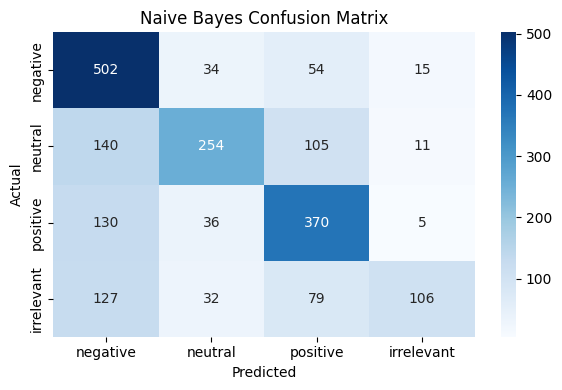

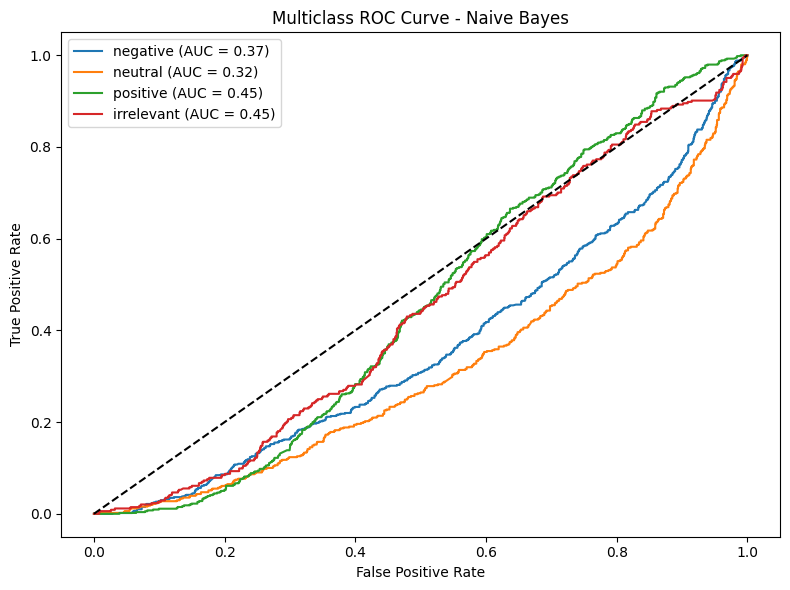

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the dataset
df_cleaned = pd.read_csv("cleaned_twitter_training.csv")

# Sample for performance
df_sampled = df_cleaned.sample(n=10000, random_state=42)

# Features and target
X = df_sampled['Text'].astype(str).fillna('')
y = df_sampled['Sentiment']
labels = ['negative', 'neutral', 'positive', 'irrelevant']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_vect, y_train)
y_pred = clf.predict(X_test_vect)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=labels)
y_score = clf.predict_proba(X_test_vect)

fpr, tpr, roc_auc = {}, {}, {}
for i, label in enumerate(labels):
    fpr[label], tpr[label], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

# Plot ROC
plt.figure(figsize=(8, 6))
for label in labels:
    plt.plot(fpr[label], tpr[label], label=f'{label} (AUC = {roc_auc[label]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve - Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()
